In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [208]:
import jupyterthemes 
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jupyterthemes.jtplot.style(theme='grade3')
jtplot.style()
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

In [24]:
onboard= pd.read_csv('onboard_users2.csv')
onboard=onboard.drop(columns=['Unnamed: 0','date_account_created', 'timestamp_first_active',])
onboard.head(2)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,affiliate_channel1,affiliate_provider1,first_affiliate_tracked1,signup_app1,first_device_type1,first_browser1,year_account_created,year_first_active,clusters,products
0,gxn3p5htnn,unknown,49.0,facebook,0,en,direct,direct,untracked,Web,...,2,4,6,2,3,8,2010,1970,1.0,Others
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,...,7,8,6,2,3,8,2011,1970,0.0,Others


In [25]:
onboard['products'].value_counts()

Others        120216
Product1       61067
Misc            9981
Product2        4899
Product3        2791
Product4        2295
Product5        2213
Product6        1391
Product7        1041
Product8         751
Product9         527
Product_10       214
Name: products, dtype: int64

In [26]:
onboard.shape

(207386, 27)

In [27]:
onboard.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'target1', 'gender1', 'signup_method1',
       'language1', 'affiliate_channel1', 'affiliate_provider1',
       'first_affiliate_tracked1', 'signup_app1', 'first_device_type1',
       'first_browser1', 'year_account_created', 'year_first_active',
       'clusters', 'products'],
      dtype='object')

In [28]:
bins = np.array(onboard['age'])
names = ['20-30', '30-40', '40-50', '50-60', '60-70','70-80']
onboard['agerange'] = pd.cut(np.array(onboard['age']),6, labels=names)

In [29]:
onboard[['age','agerange']]

,age,agerange
0,49.0,40-50
1,38.0,30-40
2,56.0,50-60
3,42.0,40-50
4,41.0,40-50
...,...,...
207381,32.0,30-40
207382,49.0,40-50
207383,32.0,30-40
207384,49.0,40-50


<AxesSubplot:>

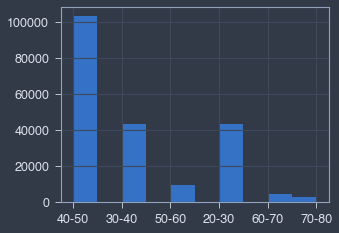

In [23]:
onboard.agerange.hist(bins=10)

<br><br>
# Language and Product Used
<br>

In [168]:
onboard['language'].unique()

array(['en', 'fr', 'de', 'es', 'pt', 'zh', 'ko', 'ja', 'it', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

In [31]:
language =pd.DataFrame(pd.crosstab(onboard['language'], onboard['products'])).reset_index(inplace=False)

In [93]:
language

products,language,Misc,Others,Product1,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,Product_10
0,ca,0,3,2,0,0,0,0,0,0,0,0,0
1,cs,2,23,6,0,0,0,1,0,0,0,0,0
2,da,2,39,14,0,1,0,2,0,0,0,0,0
3,de,18,451,187,10,6,5,7,1,24,2,3,1
4,el,1,18,2,1,0,0,2,0,0,0,0,0
5,en,9684,115450,59567,4760,2720,2255,2148,1375,996,733,520,207
6,es,46,623,162,18,8,6,19,0,6,1,0,2
7,fi,1,7,5,1,0,0,0,0,0,0,0,0
8,fr,19,756,250,67,11,12,11,7,8,4,2,2
9,hr,0,2,0,0,0,0,0,0,0,0,0,0


In [97]:
language.columns

Index(['language', 'Misc', 'Others', 'Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10'],
      dtype='object', name='products')

In [163]:
language_pivot= pd.pivot_table(language, values=['Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10','Misc', 'Others'],\
               index = 'language',\
               aggfunc=np.sum, fill_value=0)

In [164]:
from jupyterthemes import jtplot
jtplot.style()
jtplot.style(theme='gruvboxl')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

In [165]:
#https://seaborn.pydata.org/generated/seaborn.diverging_palette.html

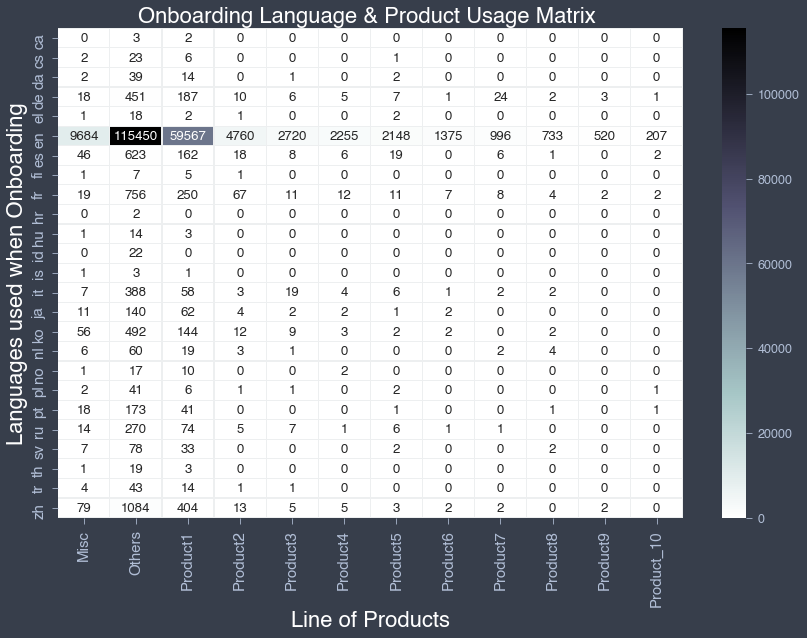

In [188]:
plt.figure(figsize=(14,9))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
#sns.heatmap(language_pivot, annot = True, fmt="d",linewidths=.1,\
            #cmap=cmap )
sns.heatmap(language_pivot, annot = True, fmt="d",linewidths=.1,\
            cmap='bone_r',linecolor='#edeff0' )
plt.title('Onboarding Language & Product Usage Matrix ', fontsize=22,c='white')
plt.xlabel('Line of Products', fontsize=22 ,c='white')
plt.ylabel('Languages used when Onboarding', fontsize=22,c='white')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<br><br>
<h2> Age Range and Product Used
   <br>

In [181]:
age = pd.DataFrame(pd.crosstab(onboard['agerange'], onboard['products'])).reset_index(inplace=False)
age

products,agerange,Misc,Others,Product1,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,Product_10
0,20-30,2597,19279,17442,1183,698,560,684,335,297,224,148,60
1,30-40,2873,18291,17940,1318,706,595,613,410,299,220,154,56
2,40-50,3494,74338,19668,1811,1060,809,716,493,319,226,158,74
3,50-60,544,4777,3333,336,171,181,104,91,66,34,42,16
4,60-70,271,2121,1626,162,89,94,62,40,42,30,13,5
5,70-80,202,1410,1058,89,67,56,34,22,18,17,12,3


In [183]:
age_pivot= pd.pivot_table(age, values=['Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10','Misc', 'Others'],\
               index = 'agerange',\
               aggfunc=np.sum, fill_value=0)

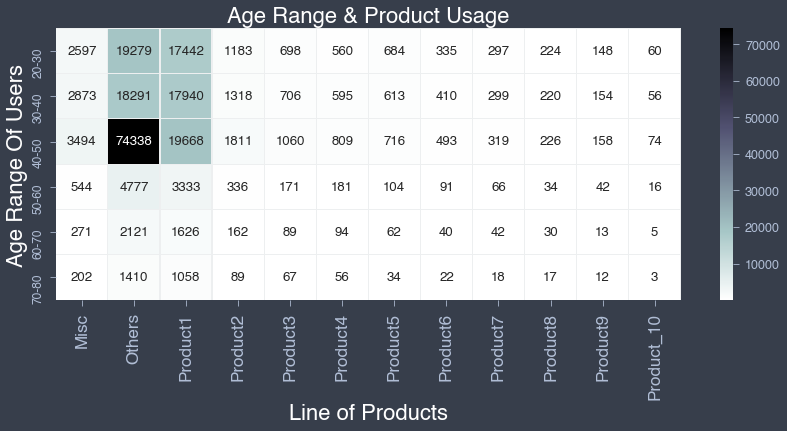

In [225]:
plt.figure(figsize=(14,5))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
sns.heatmap(age_pivot, annot = True, fmt="d",linewidths=.1,\
            cmap='bone_r',linecolor='#edeff0' )
plt.title('Age Range & Product Usage', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=12)
plt.xlabel('Line of Products', fontsize=22 ,c='white')
plt.ylabel('Age Range Of Users', fontsize=22,c='white')
plt.show()

In [198]:
age_gender = pd.DataFrame(pd.crosstab(onboard['agerange'], onboard['gender'])).reset_index(inplace=False)
age_gender

gender,agerange,FEMALE,MALE,unknown
0,20-30,21497,16506,5504
1,30-40,19213,18485,5777
2,40-50,13363,11978,77825
3,50-60,4615,3652,1428
4,60-70,2170,1689,696
5,70-80,1120,1037,831


In [199]:
gender = pd.DataFrame(pd.crosstab(onboard['gender'], onboard['products'])).reset_index(inplace=False)
gender

products,gender,Misc,Others,Product1,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,Product_10
0,FEMALE,3148,30183,22540,1949,1086,877,849,452,357,254,205,78
1,MALE,3430,25820,19314,1320,697,677,670,471,415,276,188,69
2,unknown,3403,64213,19213,1630,1008,741,694,468,269,221,134,67


<br><br>
<h2> Device used when Onboarding
   <br>

In [203]:
devicetype= pd.DataFrame(pd.crosstab(onboard['first_device_type'], onboard['products']))\
.reset_index(inplace=False)
devicetype_pivot= pd.pivot_table(devicetype, values=['Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10','Misc', 'Others'],\
               index = 'first_device_type',\
               aggfunc=np.sum, fill_value=0)

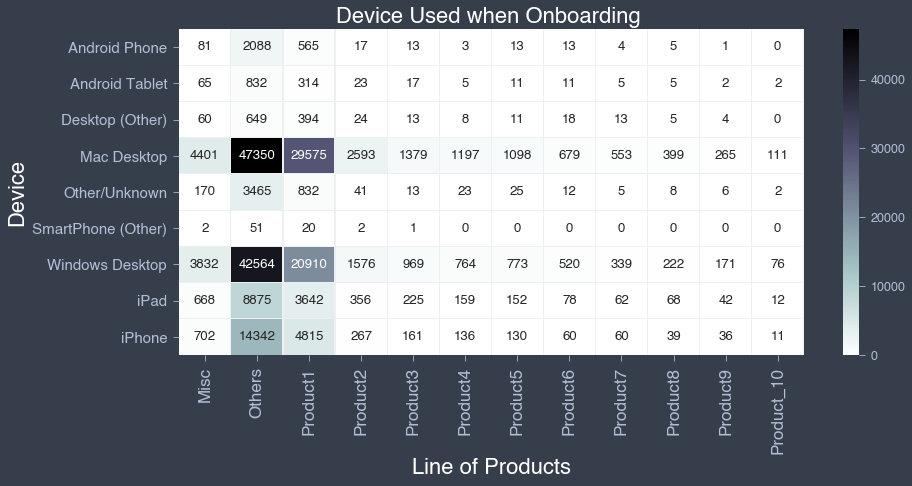

In [206]:
plt.figure(figsize=(14,6))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
sns.heatmap(devicetype_pivot, annot = True, fmt="d",linewidths=.1,\
            cmap='bone_r',linecolor='#edeff0' )
plt.title('Device Used when Onboarding ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Line of Products', fontsize=22 ,c='white')
plt.ylabel('Device', fontsize=22,c='white')
plt.show()

In [207]:
signup_app = pd.DataFrame(pd.crosstab(onboard['signup_app'], onboard['products'])).reset_index(inplace=False)
signup_app

products,signup_app,Misc,Others,Product1,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,Product_10
0,Android,171,4156,936,26,21,16,25,15,9,8,3,2
1,Moweb,193,3668,1707,54,31,33,34,28,15,13,14,3
2,Web,8954,100016,54359,4599,2595,2131,2049,1289,976,691,478,197
3,iOS,663,12376,4065,220,144,115,105,59,41,39,32,12


<br><br>
<h2> Affliate Channel of Site Traffic
    <br>

In [211]:
affiliate_channel = pd.DataFrame(pd.crosstab(onboard['affiliate_channel'], onboard['products'])).reset_index(inplace=False)
channel_pivot= pd.pivot_table(affiliate_channel, values=['Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10','Misc', 'Others'],\
               index = 'affiliate_channel',\
               aggfunc=np.sum, fill_value=0)

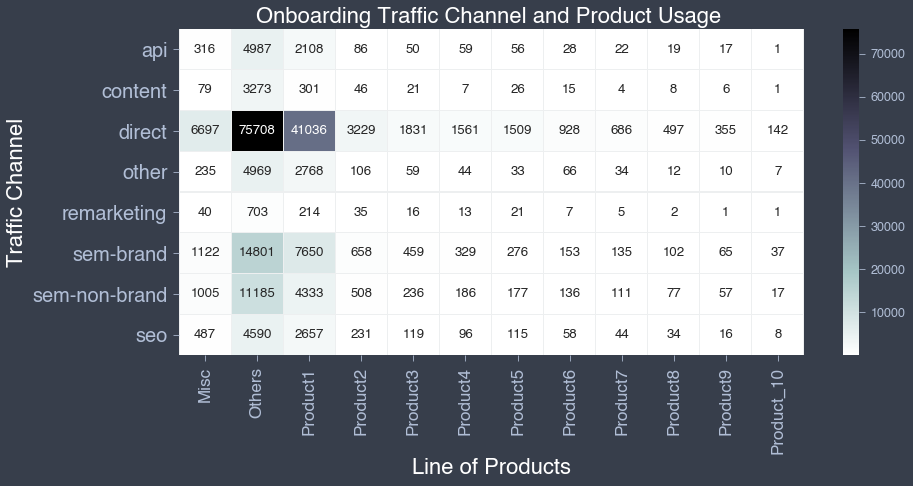

In [223]:
plt.figure(figsize=(14,6))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
sns.heatmap(channel_pivot, annot = True, fmt="d",linewidths=.1,\
            cmap='bone_r',linecolor='#edeff0' )
plt.title('Onboarding Traffic Channel and Product Usage ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
plt.xlabel('Line of Products', fontsize=22 ,c='white')
plt.ylabel('Traffic Channel', fontsize=22,c='white')
plt.show()

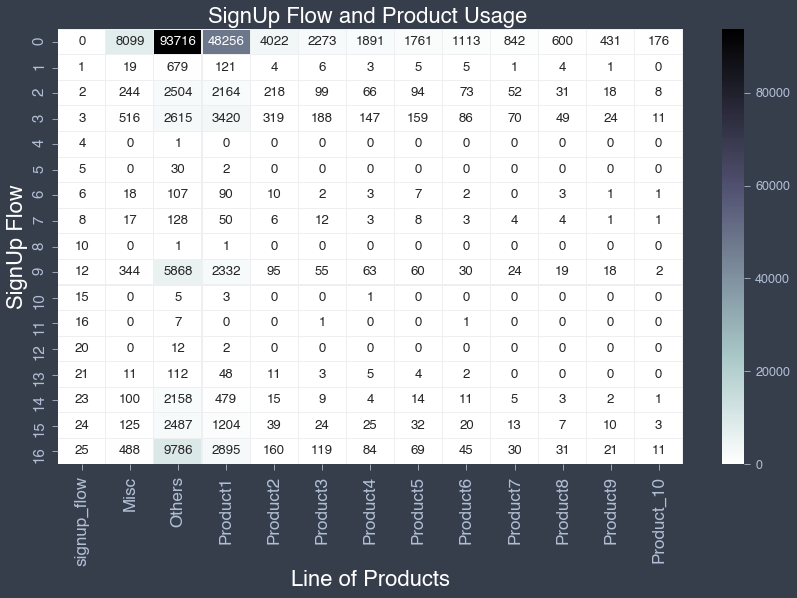

In [228]:
signup_flow =pd.DataFrame(pd.crosstab(onboard['signup_flow'], onboard['products'])).reset_index(inplace=False)
plt.figure(figsize=(14,8))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
sns.heatmap(signup_flow, annot = True, fmt="d",linewidths=.1,\
            cmap='bone_r',linecolor='#edeff0' )
plt.title('SignUp Flow and Product Usage ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Line of Products', fontsize=22 ,c='white')
plt.ylabel('SignUp Flow', fontsize=22,c='white')
plt.show()

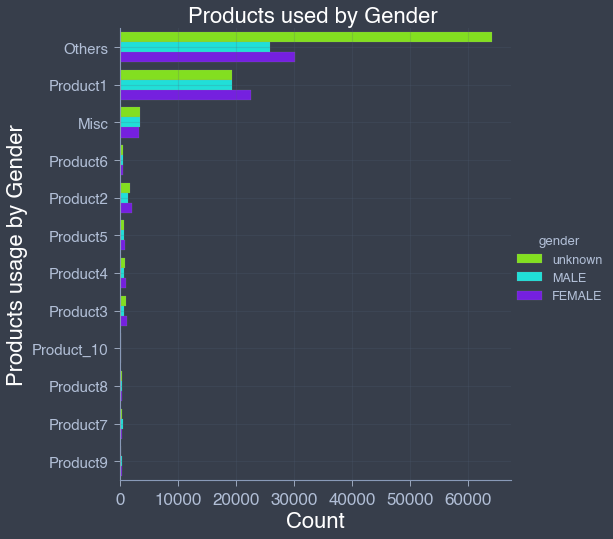

In [246]:
sns.catplot(y="products", hue="gender", kind="count",
            palette="hsv", edgecolor=".6",
            data=onboard,height=7, aspect=1)
plt.title('Products used by Gender ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Products usage by Gender', fontsize=22,c='white')
plt.grid(alpha=0.2)
plt.show()

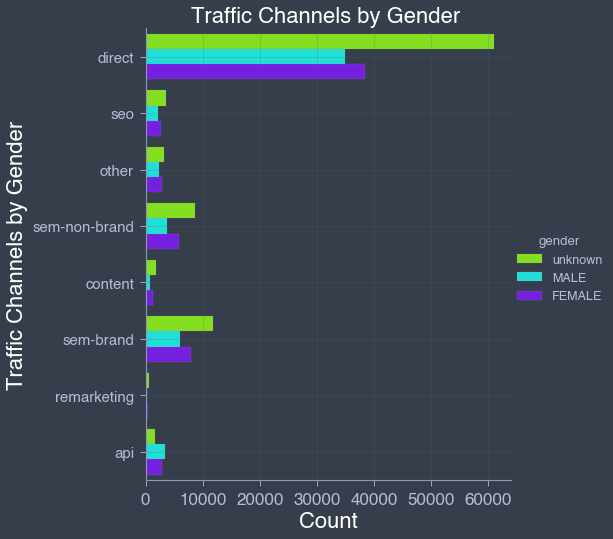

In [250]:
sns.catplot(y="affiliate_channel", hue="gender", kind="count",
            palette="hsv", edgecolor=".6",
            data=onboard,height=7, aspect=1)
plt.title('Traffic Channels by Gender ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Traffic Channels by Gender', fontsize=22,c='white')
plt.grid(alpha=0.2)
plt.show()

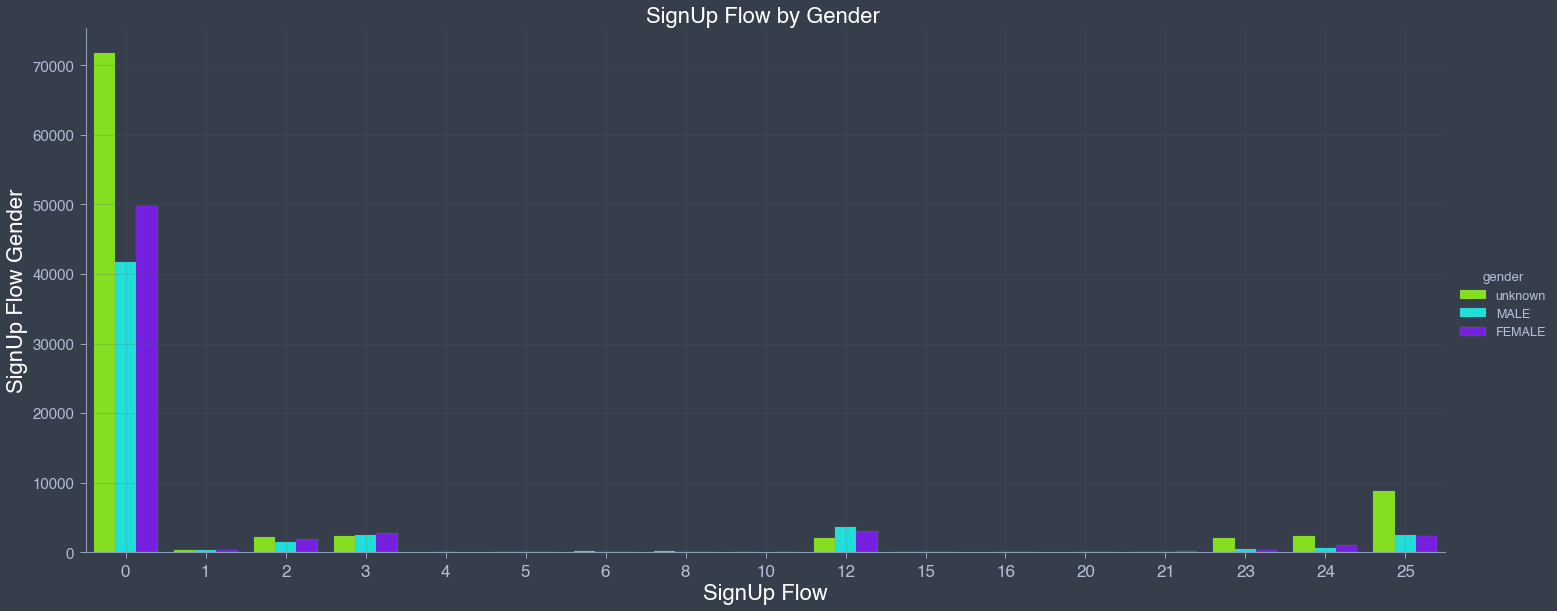

In [260]:
sns.catplot(x="signup_flow", hue="gender", kind="count",
            palette="hsv", edgecolor=".6",
            data=onboard,height=8, aspect=2.5)

plt.title('SignUp Flow by Gender ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('SignUp Flow', fontsize=22 ,c='white')
plt.ylabel('SignUp Flow Gender', fontsize=22,c='white')
plt.grid(alpha=0.2)
plt.show()

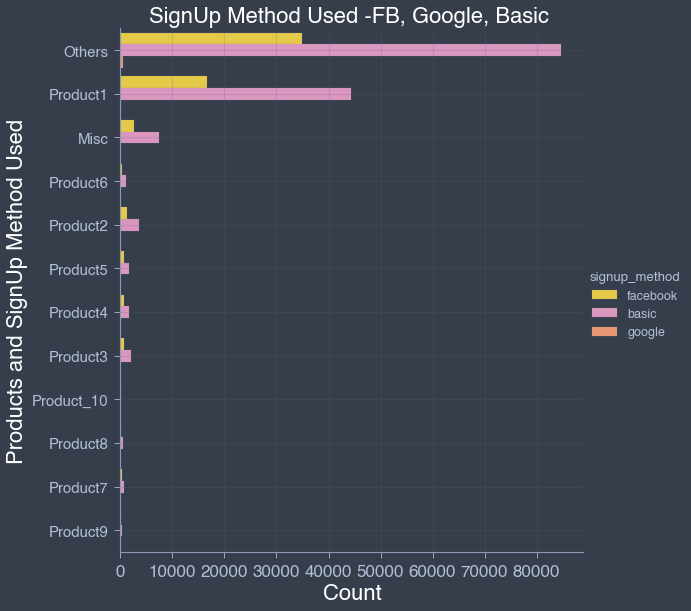

In [271]:
sns.catplot(y="products", hue="signup_method", kind="count",
            palette="Set2_r", edgecolor=".6",
            data=onboard,height=8, aspect=1)
plt.title('SignUp Method Used -FB, Google, Basic ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Products and SignUp Method Used', fontsize=22,c='white')
plt.grid(alpha=0.2)
plt.show()

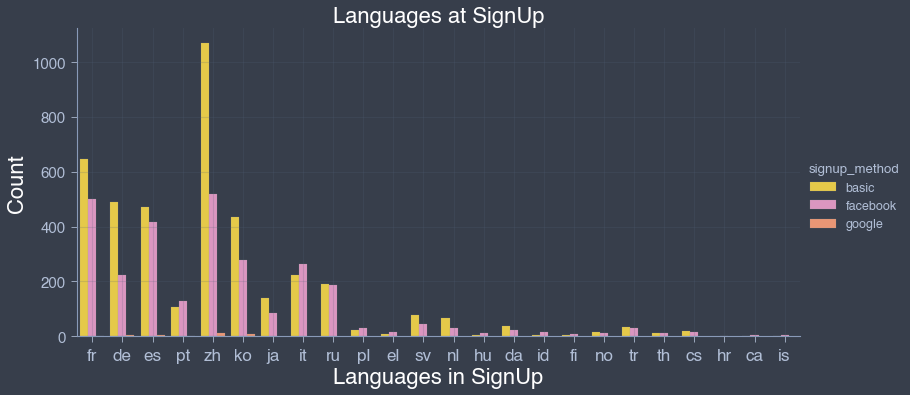

In [284]:
sns.catplot(x="language", hue="signup_method", kind="count",
            palette="Set2_r", edgecolor=".6",
            data=onboard.loc[onboard['language']!='en'],\
           height=5, aspect=2.2)
plt.title('Languages at SignUp', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=22 ,c='white')
plt.xlabel('Languages in SignUp', fontsize=22,c='white')
plt.grid(alpha=0.2)
plt.show()

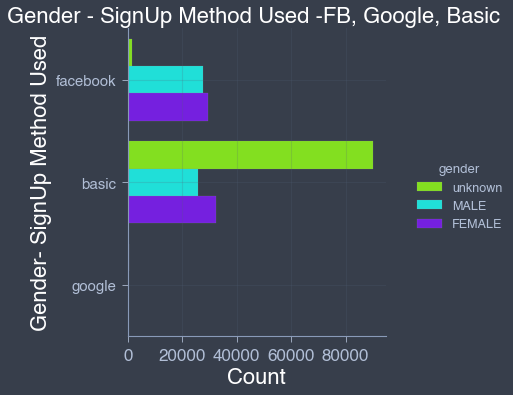

In [286]:
sns.catplot(y="signup_method", hue="gender", kind="count",
            palette="hsv", edgecolor=".6",
            data=onboard)
plt.title('Gender - SignUp Method Used -FB, Google, Basic ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Gender- SignUp Method Used', fontsize=22,c='white')
plt.grid(alpha=0.2)
plt.show()

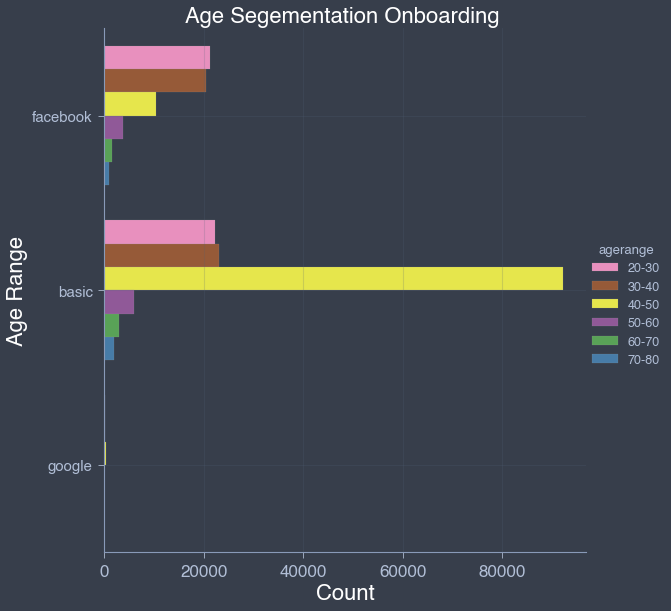

In [289]:
sns.catplot(y="signup_method", hue="agerange", kind="count",
            palette="Set1_r", edgecolor=".6",
            data=onboard,height=8, aspect=1)
plt.title('Age Segementation Onboarding ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Age Range', fontsize=22,c='white')
plt.grid(alpha=0.2)
plt.show()

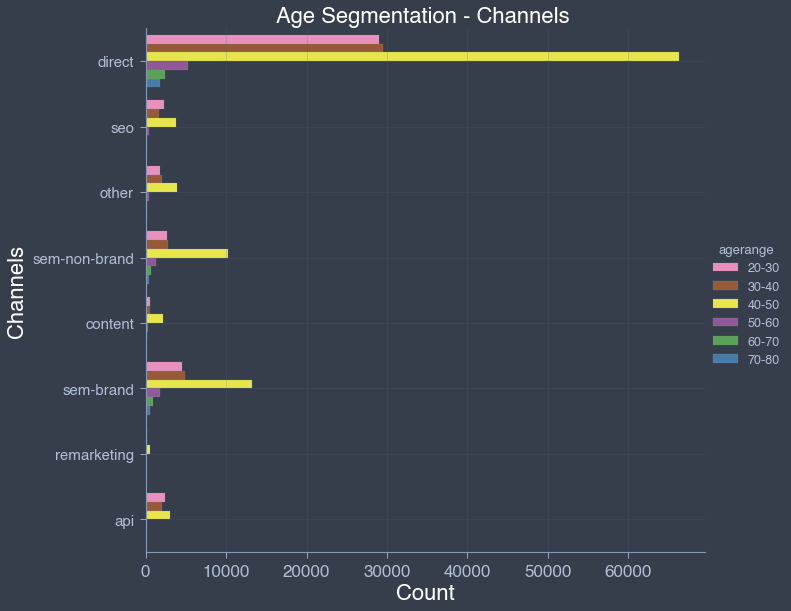

In [298]:
sns.catplot(y="affiliate_channel", hue="agerange", kind="count",
            palette="Set1_r", edgecolor=".6",
            data=onboard,height=8, aspect=1.2)

plt.title('Age Segmentation - Channels ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Channels', fontsize=22,c='white')
plt.grid(alpha=0.2)
plt.show()

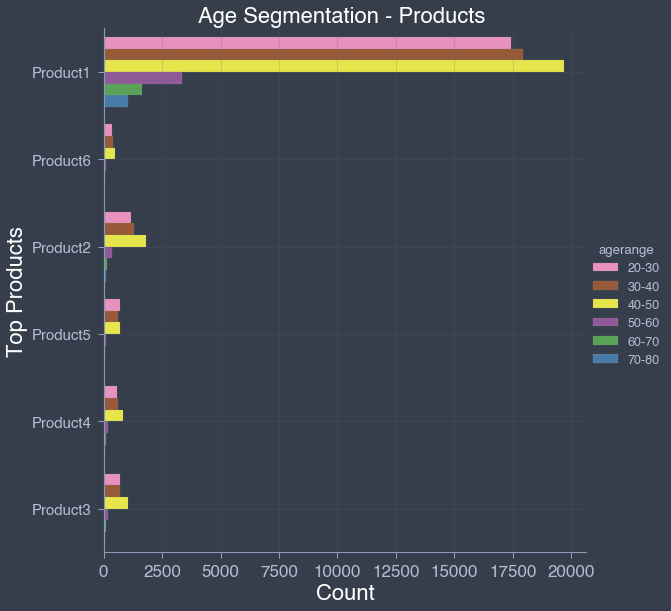

In [301]:
sns.catplot(y="products", hue="agerange", kind="count",
            palette="Set1_r", edgecolor=".6",
            data=onboard.loc[(onboard['products']=='Product1')|(onboard['products']=='Product2')\
                            |(onboard['products']=='Product3')|(onboard['products']=='Product4')
                            |(onboard['products']=='Product5')|(onboard['products']=='Product6')
                            ],height=8, aspect=1
         )
plt.title('Age Segmentation - Products ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Top Products', fontsize=22,c='white')
plt.grid(alpha=0.2)
plt.show()

<br><br>
<h2> Clustering of Onboarding Data
<br>

In [302]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [309]:
#This is numerical encoded data

In [310]:
onboard2=pd.read_csv('clean_onboard')

In [311]:
onboard2= onboard2.drop(columns=['Unnamed: 0', 'id', 'date_account_created', 'timestamp_first_active',])

In [308]:
onboard2.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,signup_method1,language1,affiliate_channel1,affiliate_provider1,first_affiliate_tracked1,signup_app1,first_device_type1,first_browser1,year_account_created,year_first_active
0,unknown,49.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,5,2,4,6,2,3,8,2010,1970
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,1,5,7,8,6,2,3,8,2011,1970
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,0,5,2,4,6,2,6,21,2010,1970
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,5,2,4,6,2,3,17,2011,1970
4,unknown,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,5,2,4,6,2,3,8,2010,1970


In [312]:
onboard2.shape

(207386, 24)

In [313]:
sample=onboard2.sample(frac=0.20, replace=True, random_state=1)

In [314]:
sample.shape

(41477, 24)

In [317]:
cat=[col for col in onboard2.columns if col not in onboard2.describe()]
num = [col for col in onboard2.columns if col in onboard2.describe()]

In [332]:
sample[num[:-2]].head(5)

,age,signup_flow,target1,gender1,signup_method1,language1,affiliate_channel1,affiliate_provider1,first_affiliate_tracked1,signup_app1,first_device_type1,first_browser1
128037,30.0,0,10,1,1,5,5,8,3,2,6,8
5192,29.0,2,11,1,1,5,1,8,0,2,6,8
50057,49.0,0,7,2,0,5,2,4,6,2,8,0
109259,31.0,0,7,2,0,5,2,4,6,2,3,8
73349,33.0,0,10,2,0,5,2,4,6,2,3,17


In [315]:
#Using 40k records

In [330]:
sample[num].columns

Index(['age', 'signup_flow', 'target1', 'gender1', 'signup_method1',
       'language1', 'affiliate_channel1', 'affiliate_provider1',
       'first_affiliate_tracked1', 'signup_app1', 'first_device_type1',
       'first_browser1', 'year_account_created', 'year_first_active'],
      dtype='object')

In [334]:
sample_c =sample[['age', 'signup_flow', 'target1', 'gender1', 'signup_method1',
       'language1', 'affiliate_channel1']]

In [335]:
from sklearn.preprocessing import normalize
scaled = normalize(sample_c)

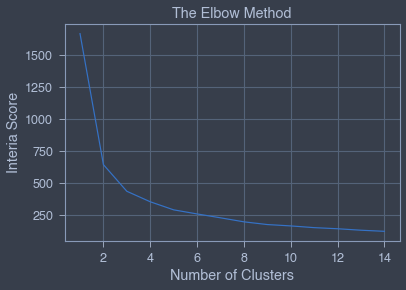

In [336]:
from sklearn.cluster import KMeans
interia_score=[]

for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=0,init='random')
    kmeans.fit(scaled)
    interia_score.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,15),interia_score)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Interia Score')
plt.grid()
plt.show()  

<h4> Best Silhoutte Score

In [337]:
for i in range(2,10,3):
    kmeans=KMeans(n_clusters=i,random_state=0,init='random')
    kmeans.fit(scaled)
    print('Number of Clusters',i)
    print(silhouette_score(scaled, kmeans.labels_))

Number of Clusters 2
0.7017629925085336
Number of Clusters 5
0.47788213212318453
Number of Clusters 8
0.3656497880845624


In [342]:
kmeans=KMeans(n_clusters=4,random_state=0,init='random')
kmeans.fit(scaled)

KMeans(init='random', n_clusters=4, random_state=0)

In [343]:
silhouette_score(scaled, kmeans.labels_)

0.47455322848907705

In [347]:
#get sample of same random_state of categorical data

In [350]:
onboard_sample =onboard.sample(frac=0.20, replace=True, random_state=1)

In [351]:
clusters=kmeans.labels_

In [352]:
cs=pd.Series(clusters)
cs.value_counts()

3    24439
1    11160
0     4533
2     1345
dtype: int64

In [355]:
#Copy index to cluster seier
onboard_sample.index=cs.index

In [356]:
onboard_sample['clusters2']=cs

In [358]:
onboard_sample.head(3)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,first_affiliate_tracked1,signup_app1,first_device_type1,first_browser1,year_account_created,year_first_active,clusters,products,agerange,clusters2
0,cs674de37p,MALE,30.0,facebook,0,en,sem-brand,google,omg,Web,...,3,2,6,8,2013,1970,2.0,Product1,20-30,1
1,d00y28mqx9,MALE,29.0,facebook,2,en,content,google,linked,Web,...,0,2,6,8,2011,1970,1.0,Misc,20-30,1
2,njlt9ilmiw,unknown,49.0,basic,0,en,direct,direct,untracked,Web,...,6,2,8,0,2013,1970,1.0,Others,40-50,3


In [359]:
import random

<h2> Visualize Clusters

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


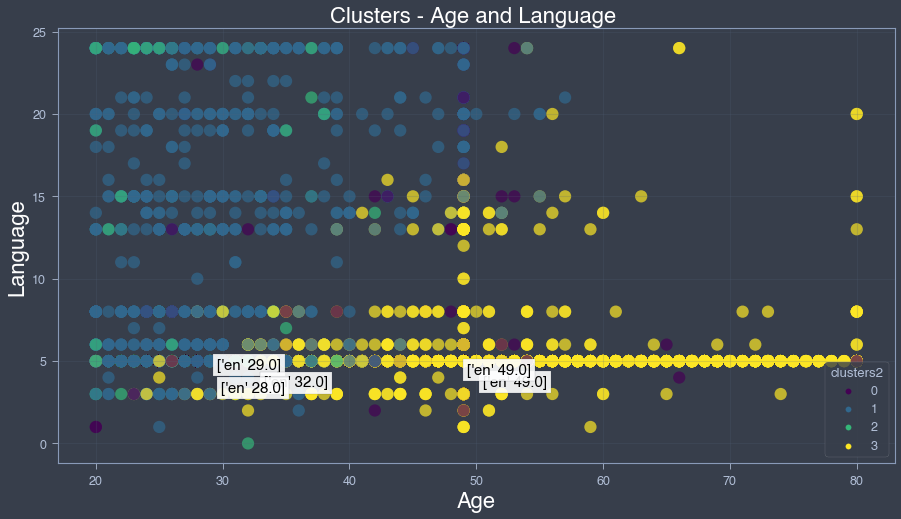

In [395]:
plt.figure(figsize=(15,8))
plt.title('Clusters - Age and Language ', fontsize=22,c='white')
plt.xlabel('Age', fontsize=22 ,c='white')
plt.ylabel('Language', fontsize=22,c='white')

sns.scatterplot(onboard_sample.age,onboard_sample.language1,\
                hue=onboard_sample.clusters2,s=150, palette="viridis",\
                linewidth=0,alpha=0.7)
plt.grid(alpha=0.2)

#plt.text(onboard_sample.age[1] ,onboard_sample.language1[1], 'Here')
#mplcursors.cursor(hover=True)

for s in range(0,20739,5000):
    i=random.randint(0,20739)
    plt.text(onboard_sample.age[i]+random.uniform(0,3), onboard_sample.language1[i]+random.uniform(0,-3),\
             str(onboard_sample[['language','age']].iloc[i].values), fontdict=dict(color="black",size=15),
         bbox=dict(facecolor="white",alpha=0.9))


/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


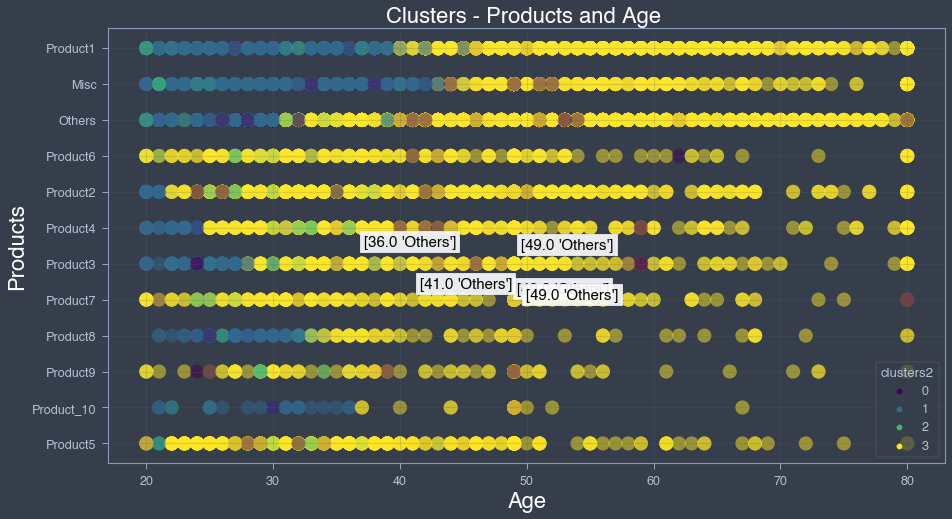

In [414]:
plt.figure(figsize=(15,8))
plt.title('Clusters - Products and Age ', fontsize=22,c='white')
plt.xlabel('Age', fontsize=22 ,c='white')
plt.ylabel('Products', fontsize=22,c='white')

sns.scatterplot(onboard_sample.age,onboard_sample.products,hue=onboard_sample.clusters2,\
                s=200, palette="viridis",linewidth=0,alpha=0.5)
plt.grid(alpha=0.2)

#plt.text(onboard_sample.age[1] ,onboard_sample.language1[1], 'Here')
#mplcursors.cursor(hover=True)

for s in range(0,20739,5000):
    i=random.randint(0,20739)
    plt.text(onboard_sample.age[i]+random.uniform(0,2), onboard_sample.language1[i]+random.uniform(0,2),\
             str(onboard_sample[['age','products']].iloc[i].values), fontdict=dict(color="black",size=15),
         bbox=dict(facecolor="white",alpha=0.9))

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


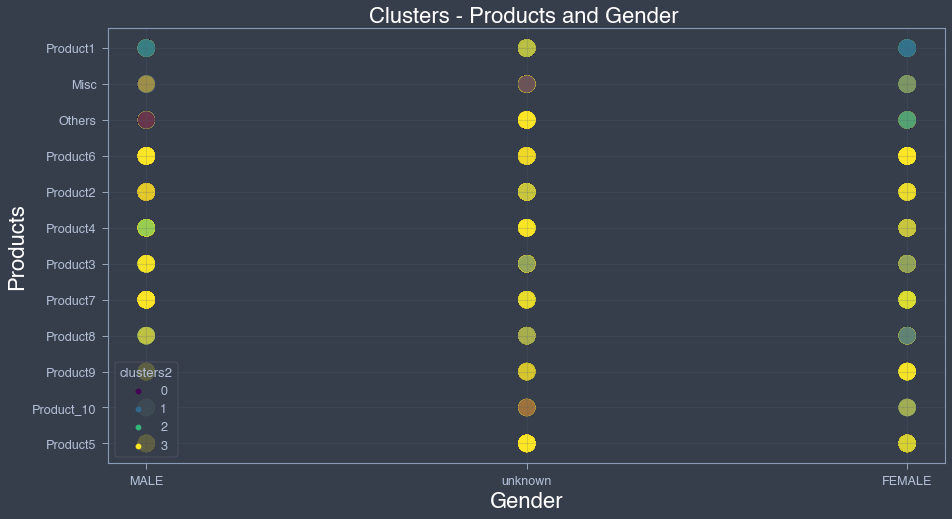

In [392]:
plt.figure(figsize=(15,8))
plt.title('Clusters - Products and Gender ', fontsize=22,c='white')
plt.xlabel('Gender', fontsize=22 ,c='white')
plt.ylabel('Products', fontsize=22,c='white')

sns.scatterplot(onboard_sample.gender,onboard_sample.products,hue=onboard_sample.clusters2,\
                s=300, palette="viridis",linewidth=0,alpha=0.5)
plt.grid(alpha=0.2)

#plt.text(onboard_sample.age[1] ,onboard_sample.language1[1], 'Here')
#mplcursors.cursor(hover=True)


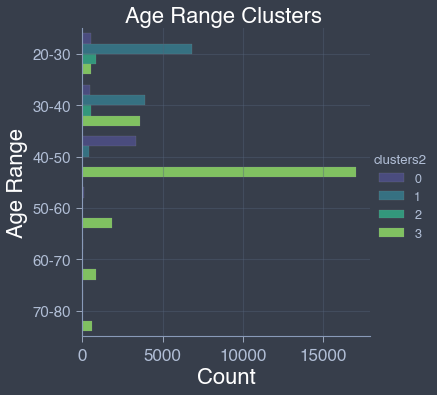

In [408]:
sns.catplot(y="agerange", hue="clusters2", kind="count",
            palette="viridis", edgecolor=".6",
            data=onboard_sample)
plt.title('Age Range Clusters ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Age Range', fontsize=22,c='white')
plt.grid(alpha=0.4)
plt.show()

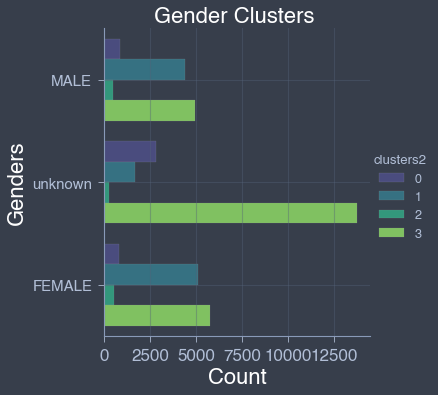

In [407]:
sns.catplot(y="gender", hue="clusters2", kind="count",
            palette="viridis", edgecolor=".6",
            data=onboard_sample)
plt.title('Gender Clusters ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Genders', fontsize=22,c='white')
plt.grid(alpha=0.4)
plt.show()

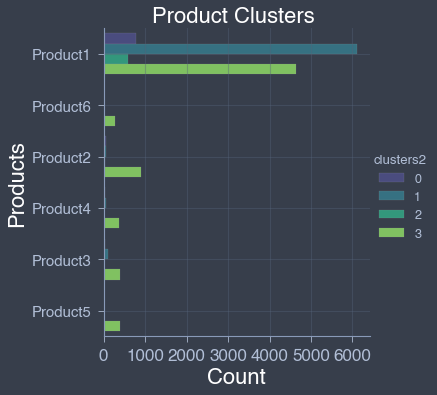

In [406]:
sns.catplot(y="products", hue="clusters2", kind="count",
            palette="viridis", edgecolor=".6",
            data=onboard_sample.loc[(onboard_sample['products']=='Product1')|(onboard_sample['products']=='Product2')\
                            |(onboard_sample['products']=='Product3')|(onboard_sample['products']=='Product4')
                            |(onboard_sample['products']=='Product5')|(onboard_sample['products']=='Product6')
                            ])
plt.title('Product Clusters ', fontsize=22,c='white')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=22 ,c='white')
plt.ylabel('Products', fontsize=22,c='white')
plt.grid(alpha=0.4)
plt.show()